<a href="https://colab.research.google.com/github/carolpascott/Machine-Learning/blob/master/RNA_analise_limpeza_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#incluir 3 arquivos em vent_nok

#filename = "vent_solto_ok"             #9767
#filename1 = "vent_preso_peso_ok"       #16499
#filename2 = "vent_preso_semtampa_ok"   #16499

#df2 = pd.read_csv("/content/" + filename + ext)  #, names= header)
#df1 = pd.read_csv("/content/" + filename1 + ext)
#df = pd.read_csv("/content/" + filename2 + ext)

In [ ]:
#df = df.iloc[:8633,:].append(df1.iloc[:8633,:], ignore_index=True)

In [ ]:
#df = df.append(df2.iloc[:8633,:], ignore_index=True)

In [ ]:
filename = "vent_ok"

ext = ".csv"
header = ['aX','aY','aZ','gX','gY','gZ']

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dados_mpu6050/" + filename + ext)

In [ ]:
df #começo e final do dataframe

,aX,aY,aZ,gX,gY,gZ
0,-1840,3020.0,-14588.0,-1062.0,-240.0,-639.0
1,984,1888.0,-15544.0,-980.0,197.0,-25.0
2,2016,3096.0,-16092.0,-907.0,403.0,229.0
3,1980,2200.0,-15720.0,-1081.0,-204.0,113.0
4,-1496,2176.0,-15880.0,-1038.0,-263.0,388.0
...,...,...,...,...,...,...
25894,-1812,1356.0,-14796.0,-826.0,44.0,303.0
25895,1308,1988.0,-16084.0,-1030.0,-65.0,897.0
25896,3908,2652.0,-15536.0,-1116.0,446.0,8.0
25897,1076,3136.0,-15568.0,-802.0,-417.0,-747.0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25899 entries, 0 to 25898
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aX      25899 non-null  int64  
 1   aY      25895 non-null  float64
 2   aZ      25873 non-null  float64
 3   gX      25873 non-null  float64
 4   gY      25873 non-null  float64
 5   gZ      25873 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.2 MB


,aX,aY,aZ,gX,gY,gZ
count,25899.000000,25895.000000,25873.000000,25873.000000,25873.000000,25873.000000
mean,5.307850,2251.160533,-15825.569822,-1015.468558,109.416109,143.365748
std,1988.037448,825.991385,650.135743,93.661511,340.670452,436.619240
min,-21134.000000,-624.000000,-18088.000000,-1356.000000,-845.000000,-913.000000
25%,-1344.000000,1704.000000,-16296.000000,-1079.000000,-171.000000,-150.000000
50%,-48.000000,2256.000000,-15856.000000,-1015.000000,113.000000,150.000000
75%,1216.000000,2844.000000,-15364.000000,-949.000000,402.000000,424.000000
max,6244.000000,4680.000000,-13748.000000,-698.000000,935.000000,1241.000000


Verificar se os dados possuem inconsitências visíveis para então prosseguir com a limpeza.

(se Dtype == int64)

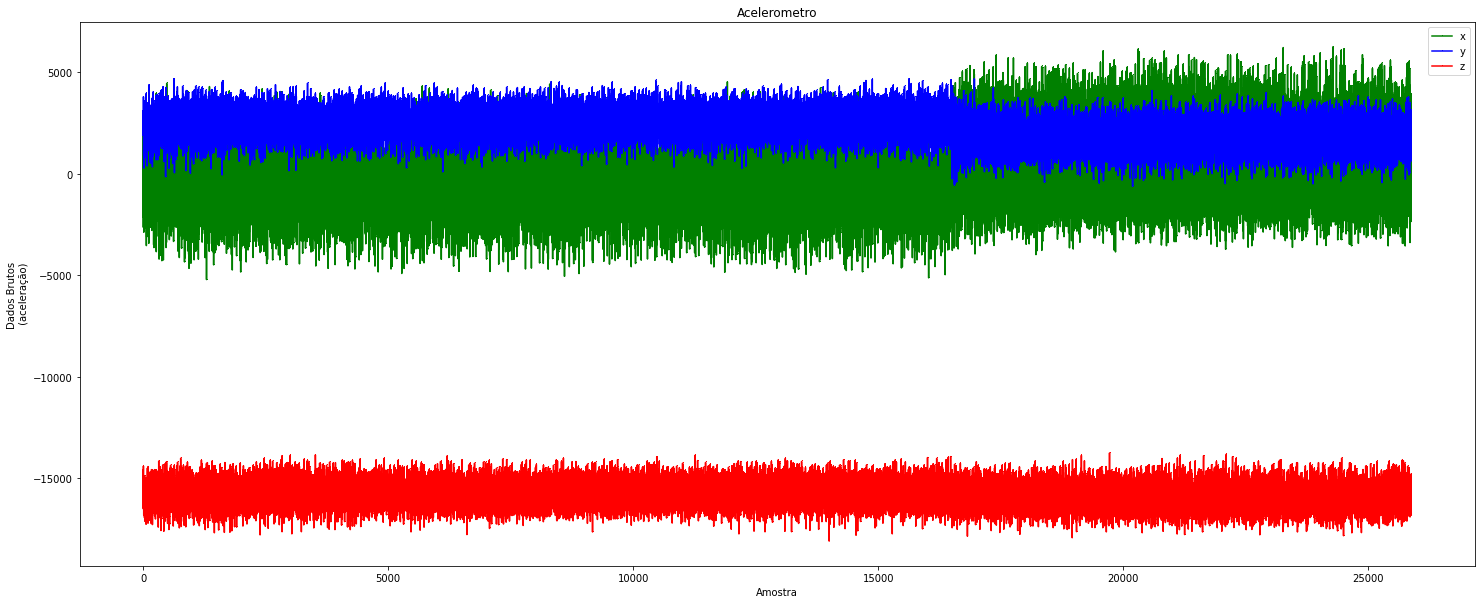

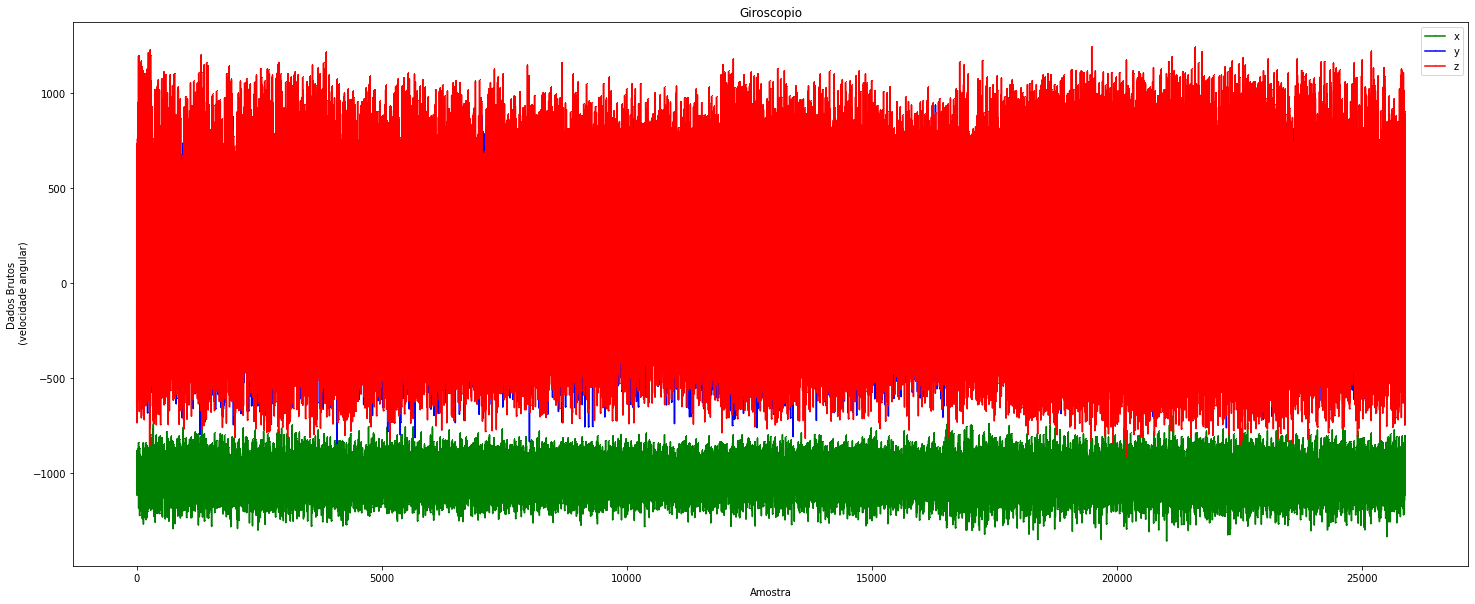

In [ ]:
index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (25,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acelerometro")
plt.xlabel("Amostra")
plt.ylabel("Dados Brutos\n (aceleração)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Giroscopio")
plt.xlabel("Amostra")
plt.ylabel("Dados Brutos\n (velocidade angular)")
plt.legend()
plt.show()

Limpeza dos dados baseado em:
https://medium.com/turing-talks/como-fazer-uma-limpeza-de-dados-completa-em-python-7abc9dfc19b8

In [ ]:
#função que substitui dados que não sejam numericos para NaN (not a number)

def to_num(DataFrame, columns):
    for col in columns:
      DataFrame[col] = pd.to_numeric(DataFrame[col], errors='coerce')
           
to_num(df, header)

In [ ]:
#linhas que possuam NaN serão excluídas
df.dropna(inplace=True)
#converte os dados para int64
df = df.astype('int64')

Outliers são dados que fogem muito do padrão dos demais.

As próxima células só deverão ser executadas caso esses dados sejam oriundos de falha na coleta.

In [ ]:
#função para que dados inconsistentes sejam substituidos por NaN (not a number)
def exclui_outliers(DataFrame, col_name, n_interv):
  intervalo = n_interv*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

In [ ]:
#numerical_cols = ['aX','aY','aZ','gX','gY','gZ']
numerical_cols = header
n_intv = 5  #intervalo que será analisado do df, se necessário, altere
            #quanto menor, mais dados serão excluídos

for col in numerical_cols:
  exclui_outliers(df, col, n_intv)

df.dropna(inplace=True)
df = df.astype('int64')

Execute a célula de visualização dos dados novamente, se estiver ok, salve e baixe o dado tratado em um novo arquivo csv.



In [ ]:
#salva o dataframe tratado em um novo arquivo csv
#df = df.iloc[:25900,:] #limitar qtdes de linhas

df.to_csv('vent_ok' + ext, encoding='utf-8', index=False)
#df.to_csv(filename + '_ok' + ext, encoding='utf-8', index=False)